In [1]:
import pandas as pd
import numpy as np
from numpy import loadtxt
from sklearn.metrics import accuracy_score
import seaborn as sns
from pickle import dump

In [2]:
X_train = pd. read_csv("test_train_data/X_train_scaled.csv")

In [3]:
X_train
X_train.shape

(425, 30)

In [4]:
X_test = pd. read_csv("test_train_data/X_test_scaled.csv")

In [5]:
X_test

,-4.680988235339657022e-01,-1.417132214436515325e-01,-4.446804212154359393e-01,-4.859789991757254013e-01,2.933710712031453172e-01,6.406158886286562881e-02,-9.450340705455509416e-02,-2.521142224818700983e-01,4.657345855505237164e-01,1.555962001287494179e-01,...,-2.600211350729509374e-01,-1.440020011235441655e-01,-3.280289282276123153e-01,-3.468429726465727669e-01,4.913802439952560941e-01,-6.654264734360894329e-02,-3.006618500844384159e-03,-1.733109153598020313e-01,2.211716272784566839e-01,2.365598538806184259e-01
0,1.364457,0.499588,1.306438,1.334411,-0.391720,0.007650,0.261460,0.840001,-0.814742,-1.107774,...,1.810752,0.178262,1.786327,1.757553,-0.513093,-0.094689,0.005044,1.029430,-0.531619,-0.994057
1,0.378785,0.066532,0.404309,0.263973,0.977745,0.385023,0.753059,0.875964,0.488134,-0.643707,...,0.638221,0.081915,0.545259,0.499981,1.008706,-0.055820,0.560546,0.602100,-0.066612,-0.179720
2,-0.487926,-0.359424,-0.429027,-0.525583,0.705429,0.565928,-0.128126,-0.522366,0.040153,1.165461,...,-0.697626,-0.431382,-0.522967,-0.633959,0.594845,0.101666,-0.137857,-0.605303,-0.523489,0.583365
3,-0.731511,-1.126145,-0.709964,-0.707875,0.306987,0.184665,-0.255992,-0.576575,0.066286,0.722173,...,-0.827442,-0.967936,-0.850791,-0.736690,0.142186,-0.240782,-0.442779,-0.675541,-0.892568,-0.114232
4,1.834633,2.397459,1.986124,1.713601,1.594041,3.394274,3.361334,2.756887,2.227790,1.046327,...,1.995007,2.311187,2.352375,1.677847,1.457054,4.157426,3.376297,2.367363,1.965759,2.315113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,0.146530,-0.936832,0.160034,-0.008481,1.264394,0.610668,0.155244,0.605447,1.178770,0.118194,...,0.026830,-1.207142,0.076075,-0.124200,-0.150966,0.409936,-0.036719,0.420290,0.443920,0.078818
138,0.092714,0.241647,0.107307,-0.034322,0.226725,0.351954,0.388817,0.318800,0.559064,0.284427,...,0.443497,0.766312,0.333370,0.301603,1.034572,1.057973,1.152276,1.105573,3.048607,1.022424
139,-0.873130,-0.560570,-0.863614,-0.791297,0.870252,-0.475931,-0.726068,-0.606721,-0.321964,0.109882,...,-0.796035,0.155006,-0.815981,-0.712601,0.245651,-0.666999,-0.810095,-0.595824,0.195157,-0.258307
140,1.610875,0.698367,1.570074,1.699557,0.197344,0.003760,0.769615,1.249081,-0.814742,-1.199202,...,2.325828,0.892560,2.418969,2.699846,0.862130,0.450815,1.356061,1.960234,-0.178799,-0.409785


In [6]:
y_train = pd. read_csv("test_train_data/encoded_y_train.csv")
## y_train = loadtxt('y_train_categorical.csv', delimiter=',')
##y_train = y_train.to_numpy()
## y_train = y_train.ravel()

In [7]:
y_train = y_train.iloc[:, 0]

In [8]:
y_test = pd. read_csv("test_train_data/encoded_y_test.csv")
## y_test = y_test.to_numpy()
## y_test = y_test.ravel()

In [9]:
y_test = y_test.iloc[:, 0]

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report , confusion_matrix

In [11]:
logistic_model = LogisticRegression(random_state = 0)
logistic_model.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [12]:
X_train_prediction = logistic_model.predict(X_train)

In [13]:
training_data_accuracy=accuracy_score(y_train,X_train_prediction)

In [14]:
print('accuracy on training data = ',training_data_accuracy )

accuracy on training data =  0.9858823529411764


In [15]:
# logistic_model.fit(X_test,y_test)

In [16]:
X_test_prediction =logistic_model.predict(X_test)
test_data_accuracy=accuracy_score(y_test,X_test_prediction)
print('accuracy on test data = ',test_data_accuracy )

accuracy on test data =  0.9788732394366197


In [17]:
dump(logistic_model, open('pickles/logistic_model_trained_all.pkl', 'wb'))

In [18]:
input_data=(20.57,17.77,132.9,1326,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.0186,0.0134,0.01389,0.003532,24.99,23.41,158.8,1956,0.1550,0.6700,0.7511,0.2550,0.4701,0.1200)

In [19]:
input_data_as_numpy_array = np.asarray(input_data)

In [20]:
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)

In [21]:
prediction = logistic_model.predict(input_data_reshaped)
print(prediction)

[1.]


In [22]:
if(prediction==0):
    print('breast cancer is benign')
else:
    print('breast cancer is malignant')

breast cancer is malignant


In [23]:
y_predict =logistic_model.predict(X_test)
y_predict

array([1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0.,
       0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1.,
       1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 1., 0.])

In [24]:
cm = confusion_matrix(y_test,y_predict)

<AxesSubplot:>

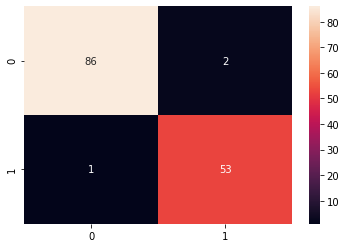

In [25]:
sns.heatmap(cm ,annot=True)

## With SK feature dataset

In [26]:
X_train_sk = pd. read_csv("test_train_data/X_train_scaled_sk.csv")
X_train_sk.shape

(425, 7)

In [27]:
X_test_sk = pd. read_csv("test_train_data/X_test_scaled_sk.csv")
X_test_sk.shape

(142, 7)

In [28]:
logistic_model_sk = LogisticRegression(random_state = 0)
logistic_model_sk.fit(X_train_sk, y_train)

LogisticRegression(random_state=0)

In [29]:
X_train_sk_prediction = logistic_model_sk.predict(X_train_sk)

In [30]:
training_data_accuracy_sk = accuracy_score(y_train,X_train_sk_prediction)

In [31]:
print('accuracy on sk training data = ',training_data_accuracy_sk )

accuracy on sk training data =  0.9552941176470588


In [32]:
# logistic_model_sk.fit(X_test_sk,y_test)

In [33]:
X_test_sk_prediction = logistic_model_sk.predict(X_test_sk)

In [34]:
test_data_accuracy_sk = accuracy_score(y_test,X_test_sk_prediction)

In [35]:
print('accuracy on sk testing data = ',test_data_accuracy_sk )

accuracy on sk testing data =  0.971830985915493


In [36]:
dump(logistic_model_sk, open('pickles/logistic_model_trained_sk.pkl', 'wb'))

## With Correlation feature dataset

In [37]:
X_train_cs = pd. read_csv("test_train_data/X_train_scaled_cs.csv")
X_train_cs.shape

(425, 7)

In [38]:
X_test_cs = pd. read_csv("test_train_data/X_test_scaled_cs.csv")
X_test_cs.shape

(142, 7)

In [39]:
logistic_model_cs = LogisticRegression(random_state = 0)
logistic_model_cs.fit(X_train_cs, y_train)

LogisticRegression(random_state=0)

In [40]:
X_train_cs_prediction = logistic_model_cs.predict(X_train_cs)

In [41]:
training_data_accuracy_cs = accuracy_score(y_train,X_train_cs_prediction)

In [42]:
print('accuracy on cs training data = ',training_data_accuracy_cs )

accuracy on cs training data =  0.9741176470588235


In [43]:
# logistic_model_cs.fit(X_test_cs,y_test)

In [44]:
X_test_cs_prediction = logistic_model_cs.predict(X_test_cs)

In [45]:
test_data_accuracy_cs = accuracy_score(y_test,X_test_cs_prediction)

In [46]:
print('accuracy on cs testing data = ',test_data_accuracy_cs )

accuracy on cs testing data =  0.971830985915493


In [47]:
dump(logistic_model_cs, open('pickles/logistic_model_trained_cs.pkl', 'wb'))